In [3]:
#ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GFC
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [4]:
#データの読み込み
train = pd.read_csv("./dataset/input/train.csv")
test=pd.read_csv('./dataset/input/test.csv')
submit_sample=pd.read_csv('./dataset/sample/submit_sample.csv')

In [5]:
#データ数の確認
print(train.shape)
print(test.shape)

(27100, 18)
(18050, 17)


In [6]:
train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
train.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0
5,5,30,blue-collar,married,primary,no,-6160,no,no,cellular,18,aug,158,1,632,0,unknown,0
6,6,33,blue-collar,married,secondary,no,88282,yes,no,cellular,27,may,345,1,272,0,unknown,0
7,7,30,admin.,single,secondary,no,59830,yes,no,cellular,27,may,184,1,639,0,unknown,0
8,8,32,admin.,single,secondary,no,7958,no,no,cellular,28,sep,101,1,525,0,success,0
9,9,31,blue-collar,married,primary,no,28066,yes,yes,unknown,15,may,345,2,433,0,unknown,0


In [8]:
test.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other
5,5,35,technician,married,secondary,no,31789,yes,no,unknown,20,jun,87,1,605,0,unknown
6,6,31,management,single,secondary,no,12428,yes,no,unknown,28,may,345,4,797,0,unknown
7,7,30,technician,single,secondary,no,30092,no,no,cellular,30,jun,177,2,121,0,unknown
8,8,30,management,married,tertiary,no,52890,yes,no,unknown,26,may,121,3,174,0,unknown
9,9,30,technician,married,tertiary,no,35956,yes,no,unknown,16,may,345,1,798,0,unknown


(array([24988.,  2112.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

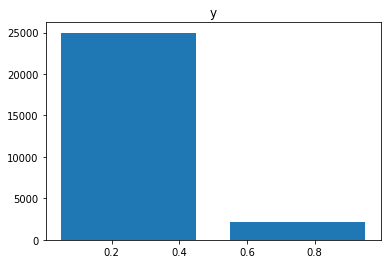

In [12]:
plt.title('y')
plt.hist(train['y'],bins=2,rwidth=0.8)

In [13]:
train['y'].value_counts()

0    24988
1     2112
Name: y, dtype: int64

RuntimeError: Can not put single artist in more than one figure

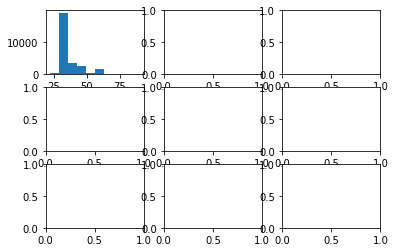

In [15]:
train.hist(figure=(20,20))

In [16]:
sns.countplot(x='soldout',hue='y',data=train)

ValueError: Could not interpret input 'soldout'

In [17]:
print('trainデータの大きさ' + str(train.shape))
train.isnull().sum()

trainデータの大きさ(27100, 18)


id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

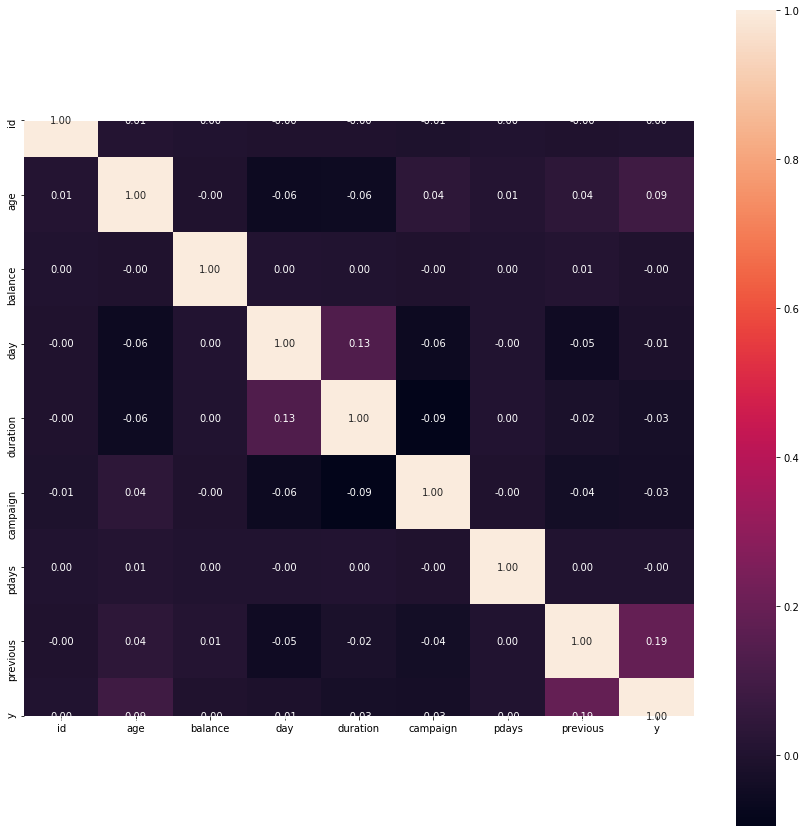

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), square=True, annot=True, fmt='.2f')

In [27]:
X = train.loc[:, ['duration','month','housing','age','pdays','campaign','previous']].values
y = train.loc[:,['y']].values
#scikit-learnの仕様に合わせて、一列のベクトルに変換
y = y.reshape(-1)

#データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std=scaler.transform()

#データセットの分割
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_std,y,test_size=0.3,random_state=0)

ValueError: could not convert string to float: 'nov'

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0)
lr.fit(Xtrain,ytrain)
#正答率の出力
print('train acc: %.3f' % lr.score(Xtrain, ytrain))
print('test acc: %.3f' % lr.score(Xtest, ytest))

NameError: name 'Xtrain' is not defined